In [64]:
import pandas as pd
import numpy as np
import pandas_profiling
import os
os.chdir(r'C:\Users\s5qa7g\Documents\Python\FA\Python_-_Statistics_for_Financial_Analysis')

In [12]:
os.getcwd()
os.listdir()

In [75]:

fb = pd.read_csv('facebook.csv').set_index(['Date'])
fb.describe()


,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,25.525000,26.085000,24.845000,25.475000,25.134513,7.215200e+06
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


In [76]:
fb = fb.dropna()
fb.profile_report()


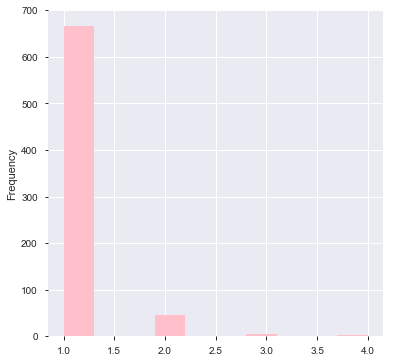

In [91]:
# fb.Close.value_counts().sort_index().plot(kind = 'his', color = 'pink', figsize = (6,6))
fb.Close.value_counts().sort_index().plot(kind = 'hist', color = 'pink', figsize = (6,6))

In [4]:
ms = pd.read_csv('microsoft.csv').set_index(['Date'])

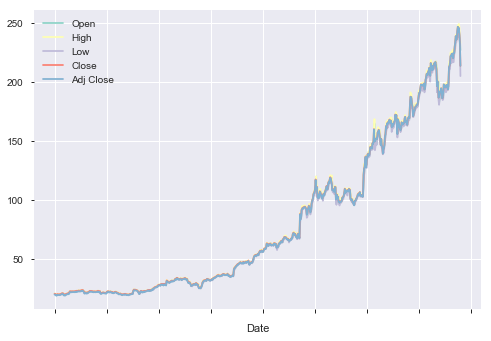

In [78]:
fb.drop(columns='Volume').plot()

In [5]:
ms.head()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
fb.describe(percentiles=[0.1,.25,.5,.99]).T

In [17]:
# select all the price information of Facebook in 2016.
fb_2015 = fb.loc['2015-01-01':'2015-12-31',['Open','Close']]
fb_2015.head()

In [18]:
fb_2015.loc['2015-03-13']

In [20]:
fb_2015[fb_2015['Open']==20.129999]

In [21]:
fb.plot(figsize=(10,8))
plt.xticks(color='khaki')
plt.yticks(color='khaki')
plt.xlabel('Date',color='w')
plt.show()

In [22]:
ms.loc['2016-01-01':'2016-12-31','Close'].plot(figsize=(10,6))
# plt.xticks(color='khaki')
# plt.yticks(color='khaki')
plt.show()

In [88]:
# fb.insert(fb.columns.get_loc('Close')+1, 'PriceDiff',  fb['Close'] - fb['Close'].shift(1)) # Thus first row of PriceDiff is 2nd row of Close - first row of close
# fb.insert(fb.columns.get_loc('PriceDiff')+1, 'Return', fb.PriceDiff/fb.Close) 
fb['PriceDiff']=fb['Close'].shift(-1) - fb['Close']
fb['ReturnTomorrow'] = fb.PriceDiff/fb.Close
fb_return_mean = fb.ReturnTomorrow.mean()
print (fb_return_mean)

0.0033623767062379347


In [92]:

fb.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,ReturnTomorrow
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,NaN,0.003990
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,0.003974,-0.016890
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.017180,-0.030318
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.031266,-0.002606
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,-0.002612,0.037618


In [102]:
print(fb['ReturnTomorrow'].var())

0.0006682078123704374


In [25]:
fb['Direction'] = [1 if fb['PriceDiff'].loc[x] > 0 else 0 for x in fb.index ]
fb['New_Direction'] = fb.PriceDiff.apply(lambda x: 1 if x > 0 else 0)

In [33]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume,new,PriceDiff,Return,Direction,New_Direction
Date,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,NaN,0,0
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,0.080000,0.080000,0.003974,1,1
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.339998,-0.339998,-0.017180,0,0
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.600000,-0.600000,-0.031266,0,0
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,-0.050002,-0.050002,-0.002612,0,0


In [27]:
fb['Direction'] = [1 if fb['PriceDiff'].loc[x] > 0 else 0 for x in fb.index ]

fb.head()

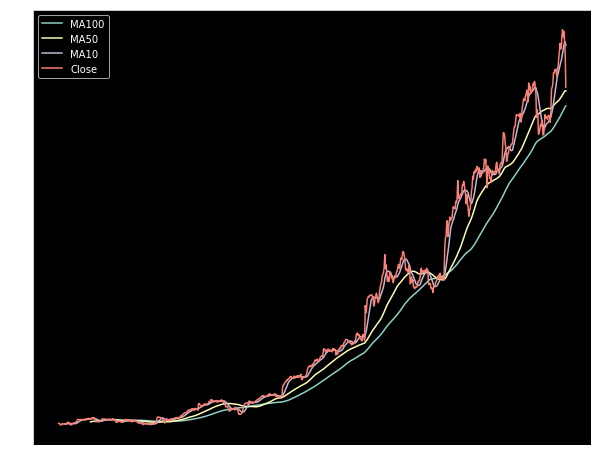

In [54]:
fb['ma50'] = fb['Close'].rolling(50).mean()
fb['ma100'] = fb['Close'].rolling(100).mean()
fb['ma10'] = fb['Close'].rolling(10).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma10'].plot(label='MA100')
fb['ma50'].plot(label='MA50')
fb['ma10'].plot(label='MA10')
fb['Close'].plot(label='Close')
plt.legend()
plt.show()

In [45]:
fb['Buy'] = [1 if fb.loc[x, 'ma10']>fb.loc[x, 'ma50'] else 0 for x in fb.index]
# fb['Sell10'] = fb.Buy.shift(10)
# fb['Sell20'] = fb.Buy.shift(20)
# fb['Sell50'] = fb.Buy.shift(50)
# fb['Sell100'] = fb.Buy.shift(100)
# fb['Close-10'] = fb['Close'].shift(-10)
# fb['Close-20'] = fb['Close'].shift(-20)
# fb['Close-50'] = fb['Close'].shift(-50)
# fb['Close-100'] = fb['Close'].shift(-100)
# import numpy as np
# fb['Buy1'] = np.where(fb['ma10']>fb['MA50'],1,0)

In [47]:
# fb['Profit-10'] = [fb.loc[x, 'Close-10'] - fb.loc[x, 'Close'] if fb.loc[x, 'Buy']==1 else 0 for x in fb.index]
fb['Profit-10'] = fb['Close'].shift(-10) - fb['Close']
fb['Profit-20'] = fb['Close'].shift(-20) - fb['Close']
fb['Profit-50'] = fb['Close'].shift(-50) - fb['Close']
fb['Profit-100'] = fb['Close'].shift(-100) - fb['Close']


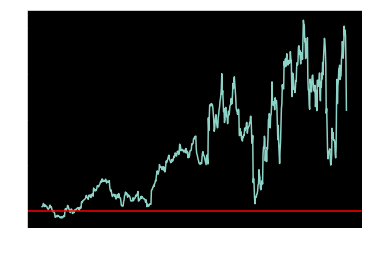

In [52]:
fb['Profit-100'].plot()
plt.axhline(y=0, color='red')

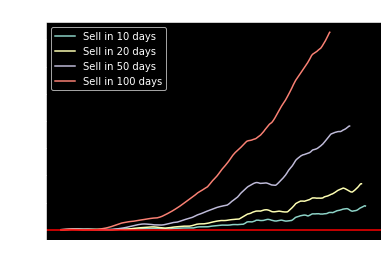

In [62]:
fb['wealth-10'] = fb['Profit-10'].cumsum()
fb['wealth-20'] = fb['Profit-20'].cumsum()
fb['wealth-50'] = fb['Profit-50'].cumsum()
fb['wealth-100'] = fb['Profit-100'].cumsum()

fb['wealth-10'].plot(label = 'Sell in 10 days')
fb['wealth-20'].plot(label = 'Sell in 20 days')
fb['wealth-50'].plot(label = 'Sell in 50 days')
fb['wealth-100'].plot(label = 'Sell in 100 days')
plt.legend()
plt.title('Buy 1 share when MA10>MA50')
plt.axhline(y=0, color='red')
plt.show()